### Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Set all the Constants

In [ ]:
!kaggle datasets download -d riyaelizashaju/skin-disease-classification-image-dataset && unzip skin-disease-classification-image-dataset.zip -d Skin_Disease_Dataset


Dataset URL: https://www.kaggle.com/datasets/riyaelizashaju/skin-disease-classification-image-dataset
License(s): unknown
skin-disease-classification-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  skin-disease-classification-image-dataset.zip
replace Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024468.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024763.jpg  
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024771.jpg  
  inflating: Skin_Disease_Dataset/Split_smol/train/Actinic keratosis/ISIC_0024800.jpg  
  inflating: Skin_Disease_Dataset/Split_smo

In [ ]:
# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 300
CHANNELS = 3
EPOCHS = 60
TRAIN_PATH = "/content/Skin_Disease_Dataset/Split_smol/train" # Make sure these paths are correct
VAL_PATH = "/content/Skin_Disease_Dataset/Split_smol/val" # Make sure these paths are correct

### Import data into tensorflow dataset object

In [ ]:
# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 697 files belonging to 9 classes.


In [ ]:
# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_PATH,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 181 files belonging to 9 classes.


In [ ]:
# Display all class names
# Display all class names
class_names = train_ds.class_names  # Use train_ds or val_ds instead of dataset
print("Class Names:", class_names)


Class Names: ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']


In [ ]:
for image_batch, labels_batch in train_ds.take(1): # Replace 'dataset' with 'train_ds' or 'val_ds'
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 300, 300, 3)
[8 4 4 5 4 0 8 7 2 8 5 0 1 5 2 1 7 7 3 3 3 4 3 4 1 3 3 8 8 8 3 7]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

### Visualize some of the images from our dataset

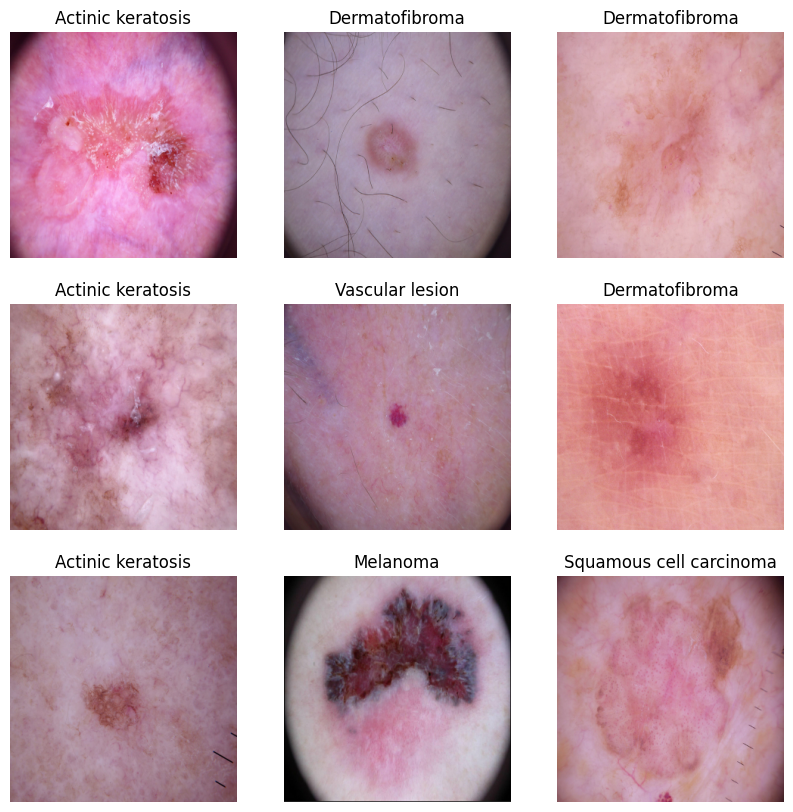

In [ ]:
# Display sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()


### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [ ]:
# Prefetch data for performance improvement
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

### Cache, Shuffle, and Prefetch the Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) # No need to define input_shape here
n_classes = 5

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), # input_shape is defined here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# model.build(input_shape=input_shape) # Remove this line, input_shape is already defined in the Rescaling layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      20,070,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,164,937 (76.92 MB)

 Trainable params: 20,164,937 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.1579 - loss: 3.3713 - val_accuracy: 0.1657 - val_loss: 2.0776
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.2784 - loss: 1.9307 - val_accuracy: 0.3039 - val_loss: 1.7742
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.3485 - loss: 1.6416 - val_accuracy: 0.3702 - val_loss: 1.5511
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.3984 - loss: 1.5162 - val_accuracy: 0.3481 - val_loss: 1.5133
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.4462 - loss: 1.4790 - val_accuracy: 0.4586 - val_loss: 1.4555
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.4644 - loss: 1.3684 - val_accuracy: 0.4751 - val_loss: 1.3971
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.4956 - loss: 1.3353 - val_accuracy: 0.5359 - val_loss: 1.3220
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.5530 - loss: 1.2059 - val_accuracy: 0.

### Run prediction on a sample image

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


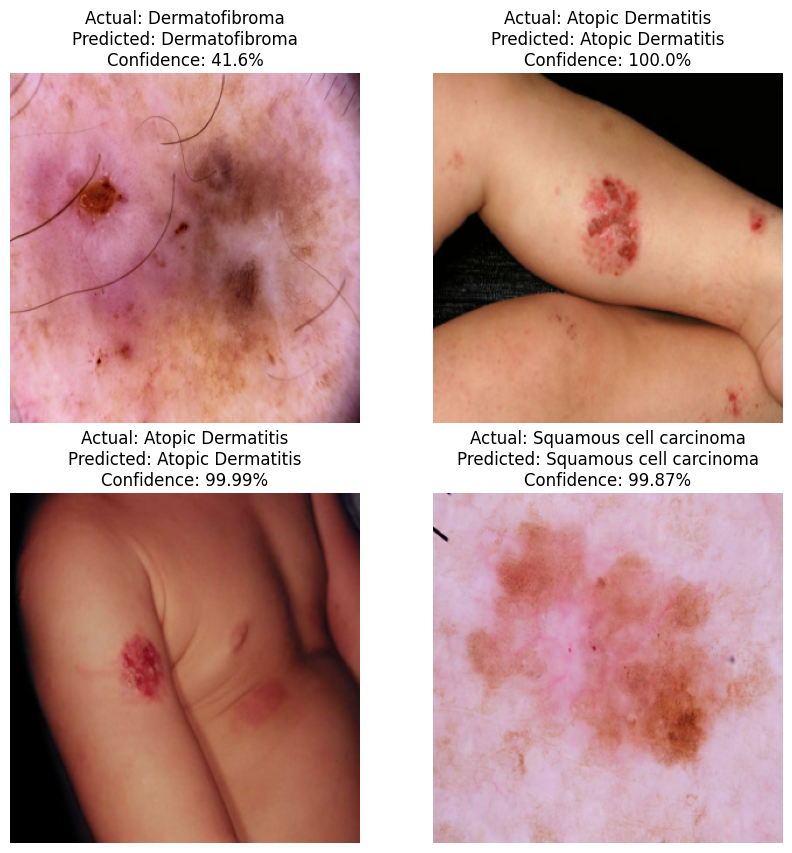

In [ ]:
# Display only 4 images with predictions
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(4):  # Show only 4 images
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Instead of passing the NumPy array to predict_image_from_path,
        # we directly use the image data for prediction:
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")
plt.show()

In [ ]:
# Function to predict from image path
def predict_image_from_path(model, img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions for batch size
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
    plt.show()

    return predicted_class, confidence

# Example usage:
# img_path = "path_to_your_image.jpg"
# predict_image_from_path(model, img_path)

# Save model
model.save("skin_disease_model.h5")

In [ ]:
# Function to predict from image path
from tensorflow.keras.preprocessing import image # Import the 'image' module from keras.preprocessing

def predict_image_from_path(model, img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions for batch size
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
    plt.show()

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


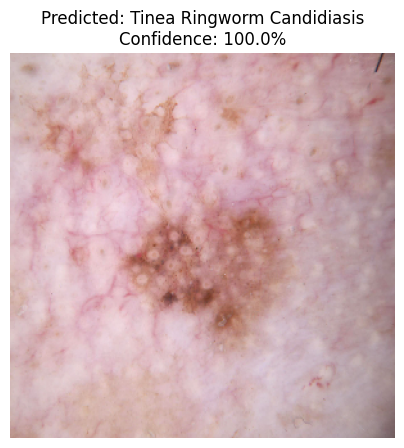

('Tinea Ringworm Candidiasis', 100.0)

In [ ]:
# Load the model before using it
from tensorflow import keras
model = keras.models.load_model("/content/skin_disease_model.h5")

# Now you can call the prediction function:
predict_image_from_path(model, "/content/Skin_Disease_Dataset/Split_smol/val/Actinic keratosis/ISIC_0026194.jpg")

### Saving the Model
We append the model to the list of models as a new version